In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [18]:
def ego_graph_effective_size(G, v):
    """ Формує его-мережу вузла `v` в мережі `G` та розраховує effective size"""
    E = nx.ego_graph(G, v, center=False, undirected=True)
    effective_size = len(E) - (2 * E.size()) / len(E)
    
    fig, ax = plt.subplots(1, 1, figsize=(18,10))
    nx.draw_networkx(E, pos)
    ax.set_title(f"Его-мережа вузла #{v}, effective network size складає {effective_size:.2f}")
    plt.figtext(
        0.5, 
        0.05, 
        r"$e(u) = n - \frac{2t}{n}$, де $n$ є кількість вузлів его-мережі, $t$ є кількістю зв'язків", 
        wrap=True, 
        horizontalalignment='center', 
        fontsize=12
    )
    plt.show()

In [3]:
G = nx.krackhardt_kite_graph()
pos = nx.spring_layout(G)

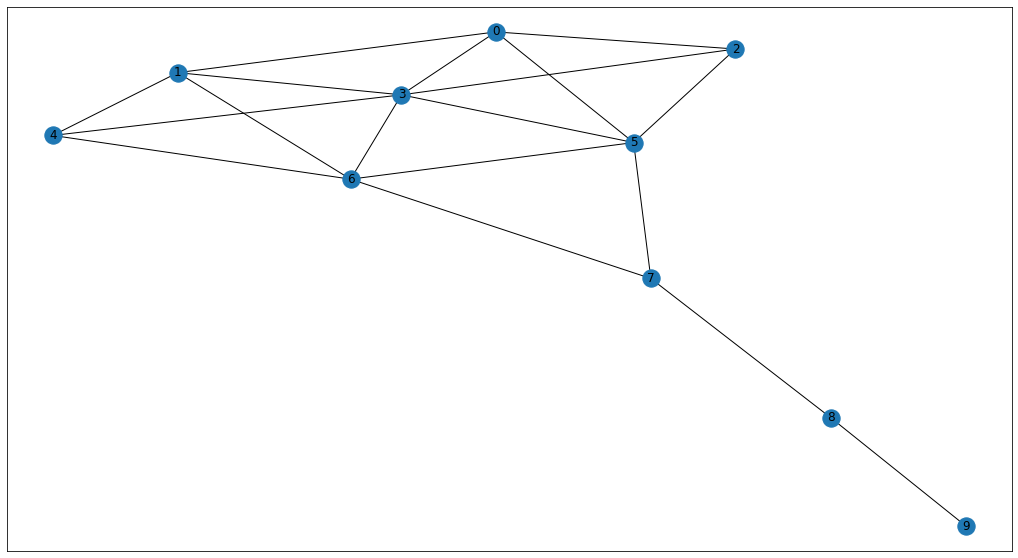

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(18,10))
nx.draw_networkx(G, pos)
plt.show()

# Скільки NODES та EDGES?

In [5]:
print(f"Кількість вузлів: {len(G.nodes())}, Перелік вузлів: {G.nodes()}")
print(f"Кількість зв'язків: {len(G.edges())}, \nПерелік зв'язків: {G.edges()}")

Кількість вузлів: 10, Перелік вузлів: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Кількість зв'язків: 18, 
Перелік зв'язків: [(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 6), (2, 3), (2, 5), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9)]


# Міри центральності мережі: Centrality, Betweenness, Closeness

In [6]:
# centrality
G.degree()

DegreeView({0: 4, 1: 4, 2: 3, 3: 6, 4: 3, 5: 5, 6: 5, 7: 3, 8: 2, 9: 1})

In [7]:
nx.degree_centrality(G)

{0: 0.4444444444444444,
 1: 0.4444444444444444,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 5: 0.5555555555555556,
 6: 0.5555555555555556,
 7: 0.3333333333333333,
 8: 0.2222222222222222,
 9: 0.1111111111111111}

In [8]:
# broker
nx.betweenness_centrality(G)

{0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

In [9]:
nx.closeness_centrality(G)

{0: 0.5294117647058824,
 1: 0.5294117647058824,
 2: 0.5,
 3: 0.6,
 4: 0.5,
 5: 0.6428571428571429,
 6: 0.6428571428571429,
 7: 0.6,
 8: 0.42857142857142855,
 9: 0.3103448275862069}

# Cliques

In [10]:
# largest cliques
[clq for clq in nx.enumerate_all_cliques(G) if len(clq) >= nx.graph_clique_number(G)]

[[0, 2, 3, 5], [1, 3, 4, 6]]

In [11]:
# size of largest clique
nx.graph_clique_number(G)

4

In [12]:
# all cliques
[*nx.enumerate_all_cliques(G)]

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 5],
 [1, 3],
 [1, 4],
 [1, 6],
 [2, 3],
 [2, 5],
 [3, 4],
 [3, 5],
 [3, 6],
 [4, 6],
 [5, 6],
 [5, 7],
 [6, 7],
 [7, 8],
 [8, 9],
 [0, 1, 3],
 [0, 2, 3],
 [0, 2, 5],
 [0, 3, 5],
 [1, 3, 4],
 [1, 3, 6],
 [1, 4, 6],
 [2, 3, 5],
 [3, 4, 6],
 [3, 5, 6],
 [5, 6, 7],
 [0, 2, 3, 5],
 [1, 3, 4, 6]]

# Effective network size

In [13]:
nx.effective_size(G)

{0: 2.0,
 1: 2.0,
 2: 1.0,
 3: 3.3333333333333335,
 4: 1.0,
 5: 3.0,
 6: 3.0,
 7: 2.3333333333333335,
 8: 2.0,
 9: 1.0}

In [14]:
# як це працює
effective_size = {}
for v in G:
    # створюється его мережа кожного вузла
    E = nx.ego_graph(G, v, center=False, undirected=True)
    # кількість вузлів в его-мережі - (2 * кількість зв'язків) / кількість вузлів в его-мережі
    effective_size[v] = len(E) - (2 * E.size()) / len(E)

In [15]:
effective_size

{0: 2.0,
 1: 2.0,
 2: 1.0,
 3: 3.3333333333333335,
 4: 1.0,
 5: 3.0,
 6: 3.0,
 7: 2.3333333333333335,
 8: 2.0,
 9: 1.0}

# Приклад розрахунку `effective size` для *NODE* `n`

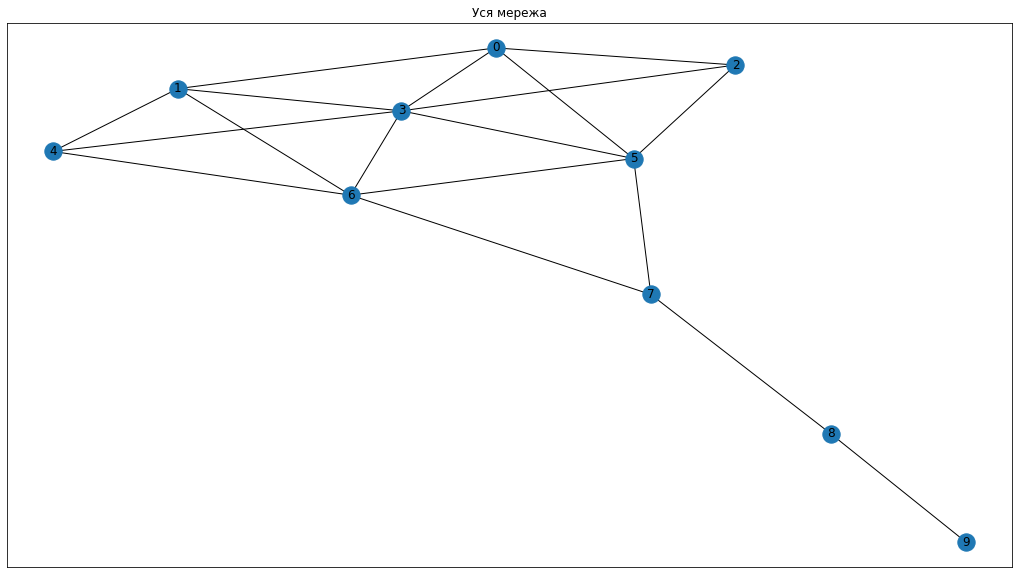

In [16]:
# повноцінна мережа
fig, ax = plt.subplots(1, 1, figsize=(18,10))
nx.draw_networkx(G, pos)
ax.set_title(f"Уся мережа")
plt.show()

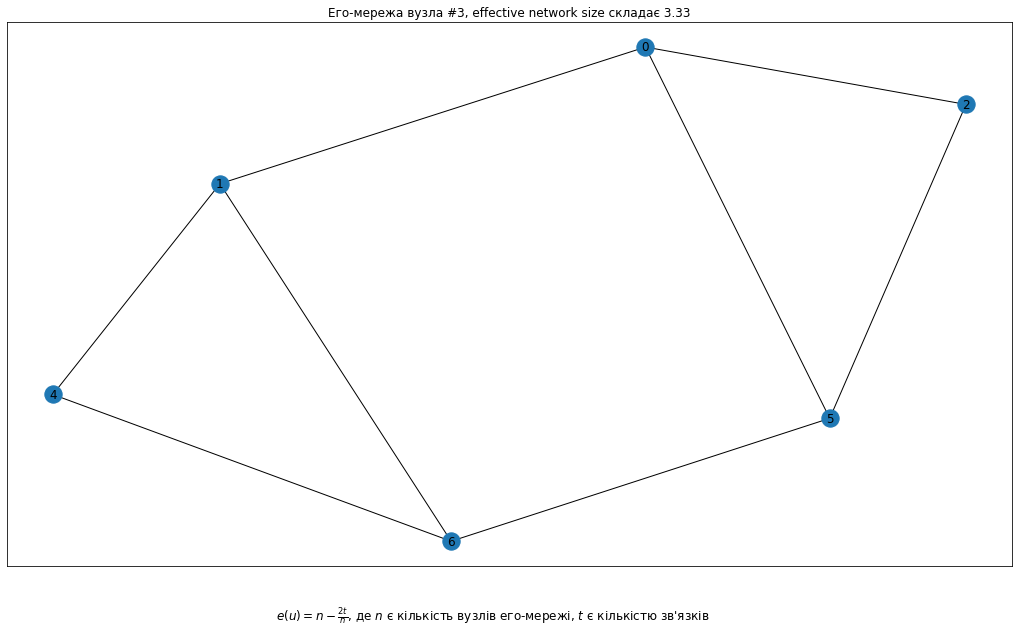

In [19]:
ego_graph_effective_size(G, 3)

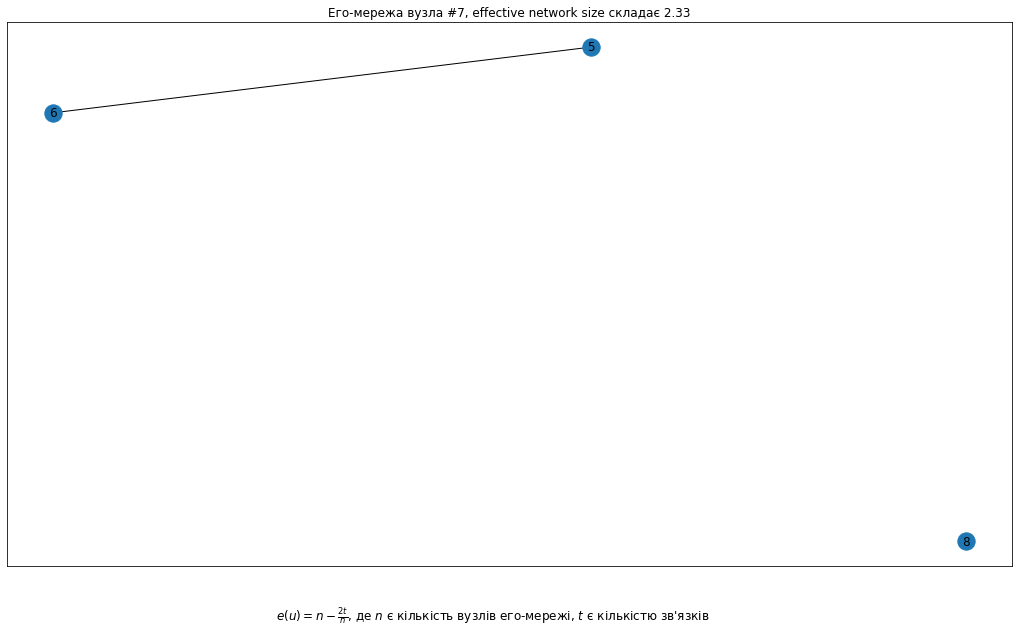

In [20]:
ego_graph_effective_size(G, 7)

In [23]:
# Як це працює
E = nx.ego_graph(G, 7, center=False, undirected=True)
number_of_nodes = len(E.nodes())
number_of_edges = len(E.edges())
print(f"{number_of_nodes=}, Nodes: {E.nodes()}")
print(f"{number_of_edges=}, Edges: {E.edges()}")
print("Формула: number_of_nodes - (2 * number_of_edges) / number_of_nodes")
print(f"Розрахунок: {number_of_nodes} - (2 * {number_of_edges}) / {number_of_nodes} = {number_of_nodes - (2 * number_of_edges) / number_of_nodes}")

number_of_nodes=3, Nodes: [8, 5, 6]
number_of_edges=1, Edges: [(5, 6)]
Формула: number_of_nodes - (2 * number_of_edges) / number_of_nodes
Розрахунок: 3 - (2 * 1) / 3 = 2.3333333333333335
